In [2]:
import numpy as np

In [3]:
from numpy.linalg import norm

In [4]:
def nextIterate(x,A,b):
    d = - (A@x +b)
    
    numerator = d.T @ d
    
    denominator = d.T @ A @d
    
    t = 0
    if denominator > numerator:
        t = numerator / denominator
    else:
        t = 1
    return x + t*d

In [5]:
def gradient(A,b,start,epsilon):
    counter = 0
    xk = start
    xk1 = start
    x_vals = [xk]
    f_vals = [1/2*xk.T@A@xk + b.T@xk]
    while norm(A@xk1 + b) > epsilon:
        y = xk1
        xk1 = nextIterate(xk,A,b)
        xk = y
        x_vals.append(xk1)
        f_vals.append(1/2*xk1.T@A@xk1 + b.T@xk1)
        counter += 1
    return xk1, 1/2*xk1.T@A@xk1 + b.T@xk1, np.array(x_vals), np.array(f_vals),counter

In [10]:
A = np.array([10,0,0,1]).reshape(2,2)
b = np.array([0,0])
n = 5
#C = np.random.normal(size=(n,n))

#A = C@C + 0.1 * np.eye(n,dtype=float)

#b = np.random.normal(size=(n,1))
#x0 = np.random.normal(size=(n,1))
x0 = np.array([10,10])
eps = 1e-3

res = gradient(A,b,x0,eps)

point = res[0]
fun = res[1]
x_vals = res[2]
x_path = x_vals[:,0]
y_path = x_vals[:,1]
f_path = res[3]
iterations = res[4]

print(point)
print(fun)
print(iterations)

[-2.632943e-06  2.632943e-04]
3.469660609638746e-08
17


In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot(X,Y,A,b):
    m,n = X.shape
    res = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            x = np.array([X[i,j],Y[i,j]])
            res[i,j]= 1/2*x.T@A@x + b.T@x
    return res

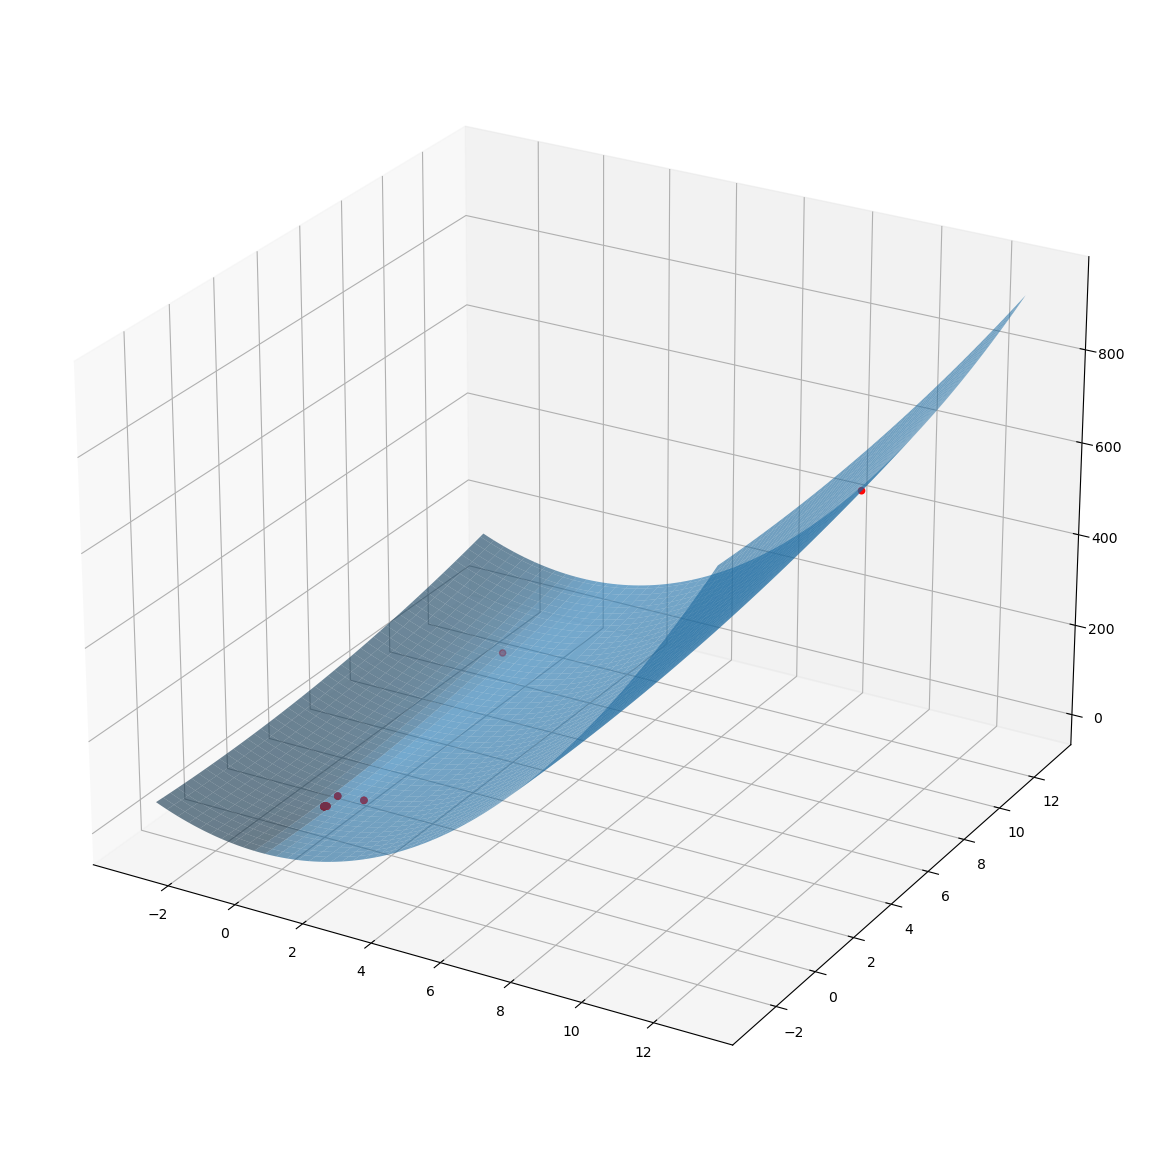

In [11]:
fig = plt.figure(figsize=(15,15),dpi=100)
ax = fig.add_subplot(projection='3d')

xu = np.max(x_path)
xl = np.min(x_path)
yu = np.max(y_path)
yl = np.min(y_path)

p = 3

x = np.linspace(xl-p,xu+p,100)
y = np.linspace(yl-p,yu+p,100)
X,Y = np.meshgrid(x,y)
Z = plot(X,Y,A,b)

ax.plot_surface(X,Y,Z,alpha=0.6)
ax.scatter(x_path,y_path,f_path,color='red')
ax.view_init(elev=25)
plt.show()
